<a href="https://colab.research.google.com/github/Atdr-Ayoub/Cars-Price-Prediction/blob/main/Car_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car price predictions

## Import libraries & Data

**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

**Data**

In [ ]:
cols = ['symboling', 'normalized-losses','make','fuel-type','aspiration','num-of-doors',
        'body-style','drive-wheels','engine-location','wheel-base','length','width',
        'height','curb-weight','engine-type','num_-of-cylinders','engine-size',
        'fuel-system','bore','stroke','compression-rate','horsepower','peak-rpm',
        'city-mpg','highway-mpg','price']

cars = pd.read_csv('/content/imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num_-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
continuous_cols = ['normalized-losses','wheel-base','length','width','height',
                   'curb-weight','engine-size','bore','stroke','compression-rate',
                   'horsepower','peak-rpm','city-mpg','highway-mpg','price']

numeric_cars = cars[continuous_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [ ]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# Transform non numerical columns to numeric type
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
# Delete the lines where the price is missing using dropna()
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [ ]:
# fill missing values with mean using fillna()
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Normalize columns except target column 'price'
price_col = numeric_cars['price']

numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


Modèle univarié

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

## First fuction calculates the rmse values for default k (k=5)
def knn_train_test(df, learn_col, target_col):
  knn = KNeighborsRegressor()
  np.random.seed(0)
# Randomize the order of our data
  shuffled_index = np.random.permutation(len(df.index))
  rand_df = df.reindex(shuffled_index)
# Split the data into two equal parts :
  last_train_row = int(len(rand_df) / 2)
  train_df = df.iloc[0:last_train_row]
  test_df  = df.iloc[last_train_row :]
# Fit our model to the data :
  knn.fit(train_df[[learn_col]], train_df[target_col])
# Predict new values :
  predictions = knn.predict(test_df[[learn_col]])
# Calculate the metrics mse and then rmse :
  mse = mean_squared_error(test_df[target_col], predictions)
  rmse = np.sqrt(mse)

  return rmse

In [ ]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# claculate rmse for each column and assign it to the 
# rmse_results dictionary

for col in train_cols:
  rmse_val = knn_train_test(numeric_cars, col, 'price')
  rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size           4190.433888
horsepower            4267.730361
highway-mpg           4628.793094
city-mpg              4814.778015
curb-weight           5166.828581
width                 7110.412630
compression-rate      8096.301512
normalized-losses     8131.436882
length                8304.189346
stroke                9334.714914
peak-rpm              9759.209970
wheel-base            9969.243292
height               10839.693636
bore                 13397.091693
dtype: float64

In [ ]:
## Second function calculates rmse for different values of k

def knn_train_test2(df, learn_col, target_col):
  np.random.seed(0)

# Randomize the order of our data
  shuffled_index = np.random.permutation(len(df.index))
  rand_df = df.reindex(shuffled_index)
# Split the data into two equal parts :
  last_train_row = int(len(rand_df) / 2)
  train_df = df.iloc[0:last_train_row]
  test_df  = df.iloc[last_train_row :]

  k_values = [1, 3, 5, 7, 9]
  k_rmses = {}

  for k in k_values :
    knn = KNeighborsRegressor(n_neighbors=k,)
# Fit our model to the data :
    knn.fit(train_df[[learn_col]], train_df[target_col])
# Predict new values :
    predictions = knn.predict(test_df[[learn_col]])
# Calculate the metrics mse and then rmse :
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)

    k_rmses[k] = rmse
  return k_rmses

In [ ]:
feature_k_rmse_results = {}

train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
  rmse_val = knn_train_test2(numeric_cars, col, 'price')
  feature_k_rmse_results[col] = rmse_val

feature_k_rmse_results

{'bore': {1: 16502.858944335483,
  3: 13895.11178798717,
  5: 13397.091693481998,
  7: 11075.156453540423,
  9: 10178.905997122287},
 'city-mpg': {1: 5347.150261662008,
  3: 5210.2611302222185,
  5: 4814.77801484941,
  7: 4575.950005056604,
  9: 4770.344178922603},
 'compression-rate': {1: 8085.605142155501,
  3: 8137.969725694832,
  5: 8096.301512113387,
  7: 7896.692870779086,
  9: 7823.115528549677},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'engine-size': {1: 5338.7918201602415,
  3: 4698.501673022703,
  5: 4190.43388788236,
  7: 4114.571307788718,
  9: 4056.629359658438},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'highway-mpg': {1: 5188.333470202142,
  3: 4655.081481516726,
  5: 4628.7930938146865,
  7: 4112.387802956751,
  9: 4029.9622707968324},
 'horsepower': {1: 7027.606971265131,
  3: 5400

normalized-losses
average_rmses: 8885.006587652755
wheel-base
average_rmses: 8953.712114458103
length
average_rmses: 8545.374123282701
width
average_rmses: 7108.476258297131
height
average_rmses: 10927.52970357331
curb-weight
average_rmses: 5570.589863746504
engine-size
average_rmses: 4479.7856097024915
bore
average_rmses: 13009.824975293473
stroke
average_rmses: 9576.240416192688
compression-rate
average_rmses: 8007.936955858497
horsepower
average_rmses: 4795.755143246612
peak-rpm
average_rmses: 10154.303500658927
city-mpg
average_rmses: 4943.696718142568
highway-mpg
average_rmses: 4522.911623857427


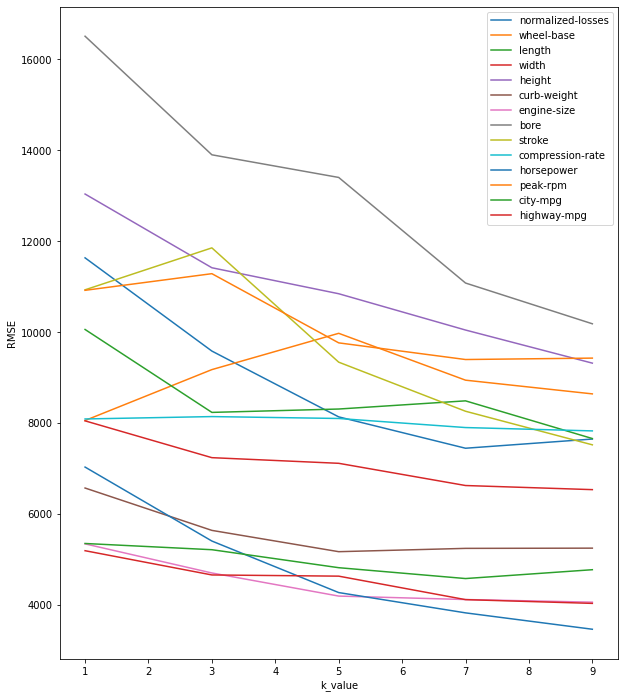

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse_results.items():
  x = list(value.keys())
  y = list(value.values())

  order = np.argsort(x)
  x_ordered = np.array(x)[order]
  y_ordered = np.array(y)[order]
  print(key)
  print('average_rmses: '+ str(np.mean(y)))
  best_features[key] = np.mean(y)

  plt.plot(x_ordered, y_ordered, label= key)
  plt.xlabel('k_value')
  plt.ylabel('RMSE')

plt.legend()
plt.show()

In [ ]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['engine-size',
 'highway-mpg',
 'horsepower',
 'city-mpg',
 'curb-weight',
 'width',
 'compression-rate',
 'length',
 'normalized-losses',
 'wheel-base',
 'stroke',
 'peak-rpm',
 'height',
 'bore']

Modèle multivarié

In [ ]:
## Third fuction calculates the rmse values for default k (k=5)
## with many columns as parameter
liste_col = []
def knn_train_test3(df, liste_col , target_col):
  knn = KNeighborsRegressor()
  np.random.seed(0)
# Randomize the order of our data
  shuffled_index = np.random.permutation(len(df.index))
  rand_df = df.reindex(shuffled_index)
# Split the data into two equal parts :
  last_train_row = int(len(rand_df) / 2)
  train_df = df.iloc[0:last_train_row]
  test_df  = df.iloc[last_train_row :]
# Fit our model to the data :
  knn.fit(train_df[liste_col], train_df[target_col])
# Predict new values :
  predictions = knn.predict(test_df[liste_col])
# Calculate the metrics mse and then rmse :
  mse = mean_squared_error(test_df[target_col], predictions)
  rmse = np.sqrt(mse)

  return rmse

In [ ]:
k_rmse_features = {}
k_rmse_features['rmse_two'] = knn_train_test3(numeric_cars, sorted_features_list[0:2], 'price')

k_rmse_features['rmse_three']= knn_train_test3(numeric_cars,sorted_features_list[0:3], 'price')

k_rmse_features['rmse_four'] = knn_train_test3(numeric_cars, sorted_features_list[0:4], 'price')

k_rmse_features['rmse_five'] = knn_train_test3(numeric_cars, sorted_features_list[0:5], 'price')

k_rmse_features['rmse_six'] = knn_train_test3(numeric_cars,  sorted_features_list[0:6], 'price')

k_rmse_features

{'rmse_five': 3874.8264102159374,
 'rmse_four': 3543.6021088353828,
 'rmse_six': 4425.238850587895,
 'rmse_three': 3553.981440358945,
 'rmse_two': 4350.739368552121}

Variation des hyper paramètres

In [ ]:
k_values = [x for x in range(1, 25)]
k_rmses = {}

## Fourth fuction calculates the rmse values for
## different values of k with many columns as parameter
liste_col = []
def knn_train_test4(df, liste_cols , target_col):

  np.random.seed(0)
# Randomize the order of our data
  shuffled_index = np.random.permutation(len(df.index))
  rand_df = df.reindex(shuffled_index)
# Split the data into two equal parts :
  last_train_row = int(len(rand_df) / 2)
  train_df = df.iloc[0:last_train_row]
  test_df  = df.iloc[last_train_row :]

  for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
# Fit our model to the data :
    knn.fit(train_df[liste_cols], train_df[target_col])
# Predict new values :
    predictions = knn.predict(test_df[liste_cols])
# Calculate the metrics mse and then rmse :
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    
    k_rmses[k] = rmse
  return k_rmses


In [ ]:
features = [sorted_features_list[0:2], sorted_features_list[0:3], sorted_features_list[0:4]]
k_rmses_results = {}

k_rmses_results['best_three_features'] = knn_train_test4(numeric_cars, sorted_features_list[0:2], 'price')
k_rmses_results['best_four_features'] = knn_train_test4(numeric_cars, sorted_features_list[0:3], 'price')
k_rmses_results['best_five_features'] = knn_train_test4(numeric_cars, sorted_features_list[0:4], 'price')

k_rmses_results

{'best_five_features': {1: 4003.9828413792443,
  2: 4131.951959131938,
  3: 3807.458087636542,
  4: 3645.9482887864647,
  5: 3543.6021088353828,
  6: 3462.33319634914,
  7: 3381.3053052910514,
  8: 3221.8924875642992,
  9: 3020.3504183783566,
  10: 3082.8858075793623,
  11: 3203.3271940951367,
  12: 3320.32157031635,
  13: 3480.138098268782,
  14: 3483.163466888698,
  15: 3488.2073831867865,
  16: 3460.6885466860917,
  17: 3420.7342053495818,
  18: 3380.3570582571792,
  19: 3379.807908444524,
  20: 3386.3950236041705,
  21: 3354.438473986951,
  22: 3356.3575258604455,
  23: 3360.720166186331,
  24: 3363.297072238637},
 'best_four_features': {1: 4003.9828413792443,
  2: 4131.951959131938,
  3: 3807.458087636542,
  4: 3645.9482887864647,
  5: 3543.6021088353828,
  6: 3462.33319634914,
  7: 3381.3053052910514,
  8: 3221.8924875642992,
  9: 3020.3504183783566,
  10: 3082.8858075793623,
  11: 3203.3271940951367,
  12: 3320.32157031635,
  13: 3480.138098268782,
  14: 3483.163466888698,
  15:

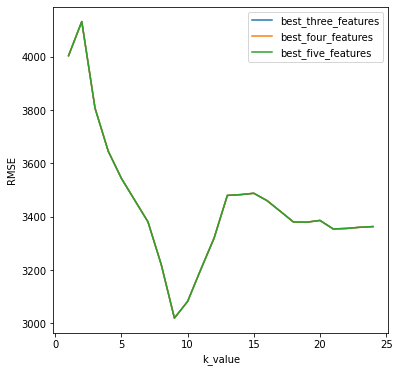

In [ ]:
plt.figure(figsize=(6, 6))

for key, value in k_rmses_results.items():

  x = list(value.keys())
  y = list(value.values())
  plt.plot(x, y, label=key)
  plt.xlabel('k_value')
  plt.ylabel('RMSE')

plt.legend()
plt.show()